# TME 5: Logique floue, suite

- Le Lorier Yann
- Nguyen Hoang-Son

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import copy as cp

Définition de la fonction de visualisation de sous-ensembles flous:

In [2]:
def visualisation(dict):
    plt.figure()
    n = len(dict)
    fig, axs = plt.subplots(nrows=n, ncols=1)
    i = 0
    for key, value in dict.items():
        x = []
        y = []
        for pt in value:
            x.append(pt[0])
            y.append(pt[1])
        axs[i,].plot(x, y, label=key)
        axs[i,].legend(loc="upper right")
        i += 1

Définissons un sous-ensemble flou:

In [3]:
ens = {
    'A' : [(0,0), (1,0), (2,1), (4,0), (10, 0)],
    'B' : [(0,0), (3,0), (5,1), (6,0), (10, 0)]
}

<Figure size 640x480 with 0 Axes>

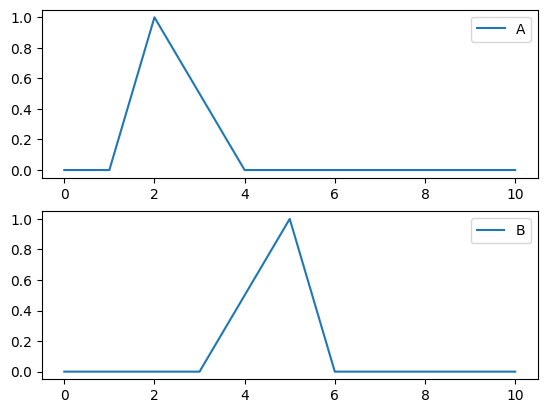

In [4]:
visualisation(ens)

In [5]:
def compute_membership(x, inflexion_points):
    for i in range(1, len(inflexion_points)):
        if x > inflexion_points[i][0]:
            continue
        else:
            m = (inflexion_points[i-1][1] - inflexion_points[i][1]) / (inflexion_points[i-1][0] - inflexion_points[i][0]) 
            b = inflexion_points[i][1] - m * inflexion_points[i][0]
            return m*x + b
        return 0

In [6]:
class T_norm:
    def __init__(self, type="probabiliste"):
        self.type = type
    
    def calculer(self, x ,y):
        if self.type == "probabiliste":
            return x*y
        if self.type == "lukasiewicz":
            return max(x+y-1,0)
        if self.type == "zadeh":
            return min(x, y)
        if self.type == "hamacher":
            if x == y and x == 0:
                return 0
            return (x*y)/(x+y-x*y)
        if self.type == "drastique":
            if x == 1:
                return y
            if y == 1:
                return x
            return 0

In [7]:
class FonctionImplication:
    def __init__(self, type="lukasiewicz"):
        self.type = type
 
    def calculer(self, x, y):
        if self.type == 'lukasiewicz':
            return min(1 - x + y, 1 )
        elif self.type == 'kleene-dienes':
            return max(1 - x, y)
        elif self.type == 'reichenbach':
            return 1 - x + x * y
        elif self.type == 'willmott':
            return max(1-x, min(x,y))
        elif self.type == 'brouwer-godel':
            return 1 if x < y else y
        elif self.type == 'goguen':
            return 1 if x == 0 else min(y/x, 1)
        elif self.type == 'rescher-gaines':
            return 1 if x <= y else 0
        else:
            return None

$f_{B'}(y) = \text{op}_{\rightarrow}(f_A(x_0), f_B(y))$

Cette fonction définit le sous ensemble flou généré par une observation spécifique $x_0$. 

In [8]:
def b_prime_implication(ensA, ensB, x0, op="lukasiewicz"):
    FImplication = FonctionImplication(type=op)
    fA_x0 = compute_membership(x0, ensA)
    interval_B = np.linspace(ensB[0][0], ensB[-1][0], 100)
    # visualiser B
    x = []
    y = []
    for pt in ensB:
        x.append(pt[0])
        y.append(pt[1])
    plt.plot(x, y, label="B")
    # calculer fB_prime_y
    fB_prime_y = np.zeros_like(interval_B)
    for i in range(len(interval_B)):
        fB_prime_y[i] = FImplication.calculer(fA_x0,compute_membership(interval_B[i], ensB))
    plt.plot(interval_B, fB_prime_y, label="f_B_prime")
    plt.legend(loc="upper right")
    plt.title(f"x0 = {x0} - operateur {op}")
    plt.show()

Exemples:

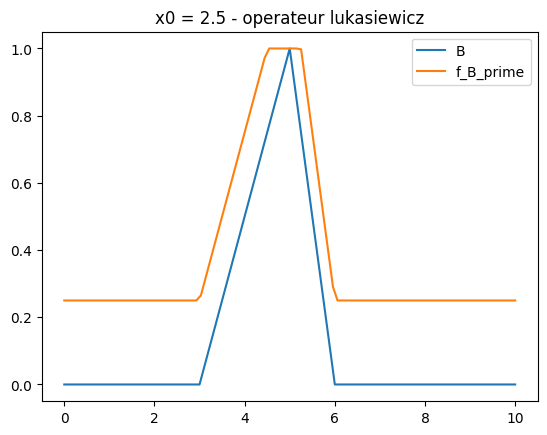

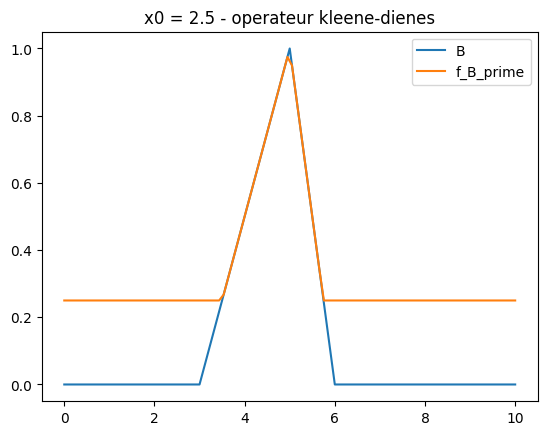

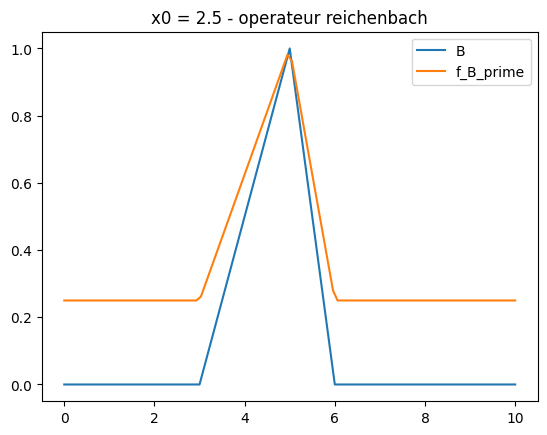

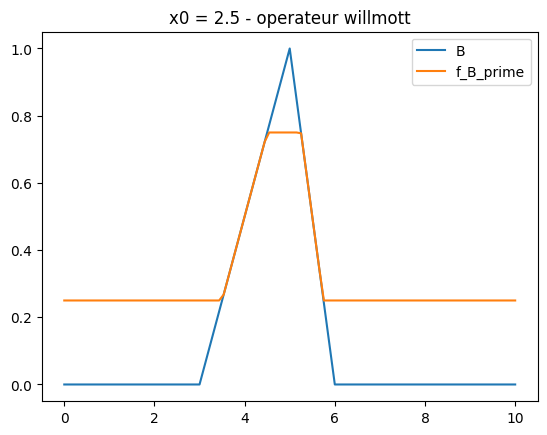

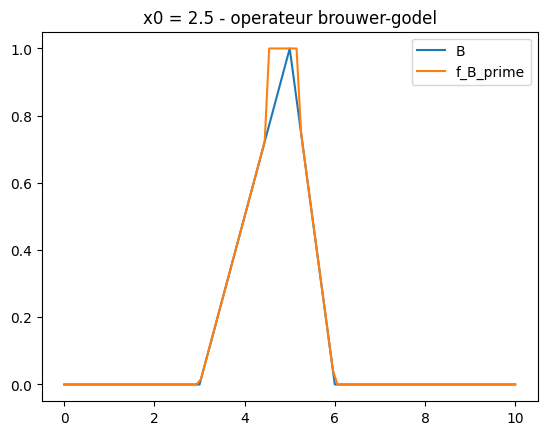

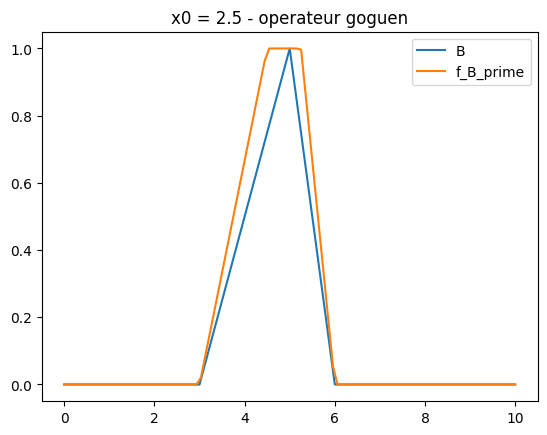

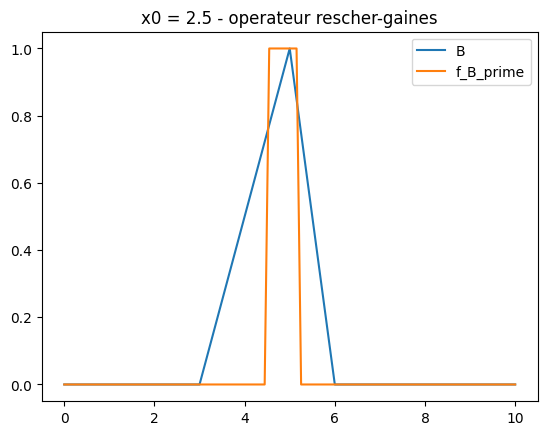

In [9]:
x0_liste = [2.5, 3, 3.5, 6, 2]
op_liste = ['lukasiewicz','kleene-dienes','reichenbach','willmott','brouwer-godel','goguen','rescher-gaines']
for x0 in x0_liste[:1]:
    for op in op_liste:
        b_prime_implication(ensA=ens['A'], ensB=ens['B'], x0=x0, op=op)

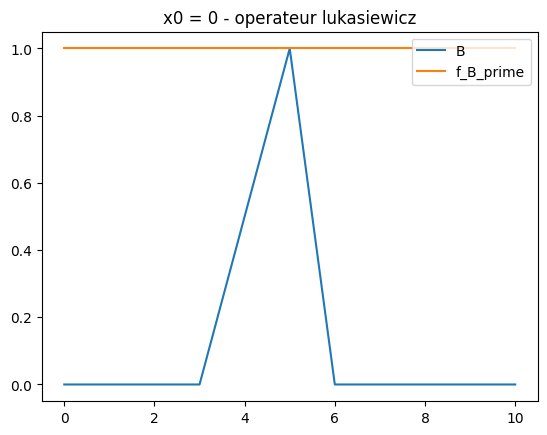

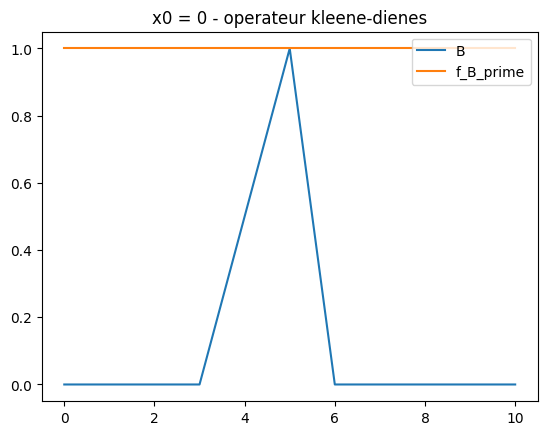

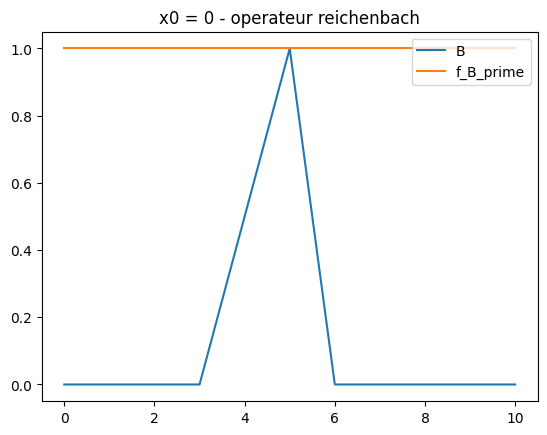

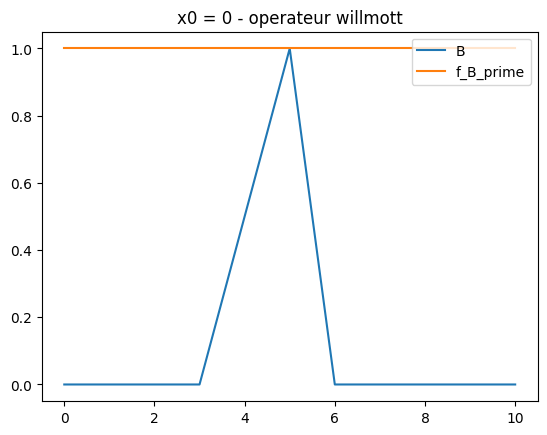

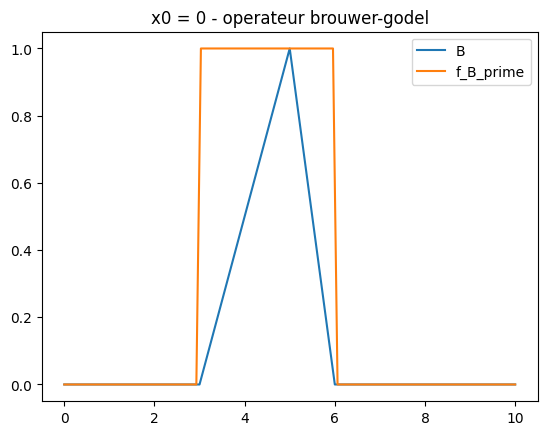

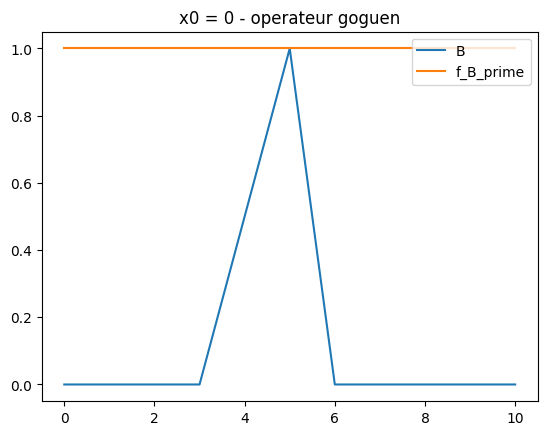

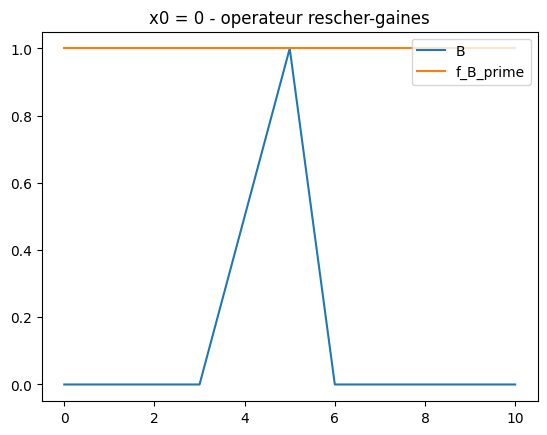

In [10]:
op_liste = ['lukasiewicz','kleene-dienes','reichenbach','willmott','brouwer-godel','goguen','rescher-gaines']
for op in op_liste:
    b_prime_implication(ensA=ens['A'], ensB=ens['B'], x0=0, op=op)

### MPG: Cas général - Pas de $x_0$

Nous allons définir la fonction f_a. Pour simplicité, nous avons choisi la fonction suivante:

$$
f_A(x) = \begin{cases}
1 \quad \text{si } x > t\\
0 \quad \text{sinon}
\end{cases}
$$

Où $t$ est un seuil fixé.

In [11]:
def seuil(x, seuil = 0.4):
    """
    Cette fonction simple est la fonction f_a
    """
    return int(x>seuil)

Nous allons alors trouver les $x \in X_V$ qui conviennent à notre fonction $f_{B'}(y)$

In [14]:
def modus_ponens_general(ensA, ensB, f_a, op="lukasiewicz"):

    #definition de nos fonctions d'implication et la T-Norme
    FImplication = FonctionImplication(type=op)
    t_norm = T_norm(op)
    
    interval_Y = np.linspace(ensB[0][0], ensB[-1][0], 100)
    interval_X = np.linspace(ensA[0][0], ensA[-1][0], 100)
    
    # visualiser B
    x = []
    y = []
    for pt in ensB:
        x.append(pt[0])
        y.append(pt[1])
    plt.plot(x, y, label="B")

    # calculer fB_prime_y
    fB_prime_y = np.zeros_like(interval_Y)
    
    for i in range(len(interval_Y)):
        meilleur = f_a(interval_X[0])
        fB_prime_y[0] = meilleur
        fb_y = compute_membership(interval_Y[i], ensB)
        
        for j in range(len(interval_X)):
            x = interval_X[j]
            fa_x = compute_membership(x, ensA)
            fa_prime = f_a(x)
            implication = FImplication.calculer(fa_x, fb_y)
            resultat = t_norm.calculer(fa_prime, implication)
            
            if resultat > meilleur:
                meilleur = resultat
                fB_prime_y[j] = x
                
    plt.plot(interval_Y, fB_prime_y, label="f_B_prime")
    plt.legend(loc="upper right")
    plt.title(f"Opérateur {op}")
    plt.show()
    return fB_prime_y

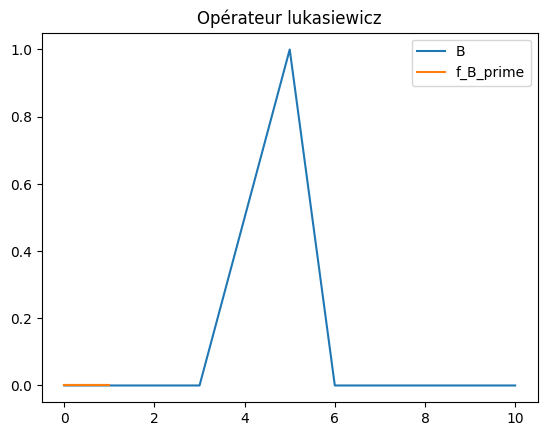

array([0, 0, 0, 0, 0])

In [15]:
modus_ponens_general(ens['A'], ens['B'], seuil)